# Regression Analysis on News Documents
In this notebook, we include all the regression analysis we did using the output of Coh-metrix on a collection of fake and real news documents.

In [2]:
# reading the excel file which includes all the information
library("readxl")
my_data <- read_excel("data/FakeNewsNet/processed/fakenewsnet_full.xlsx")
head(my_data)

X__1,DESSC,DESWC,DESPL,DESSL,DESSLd,DESWLsy,DESWLsyd,DESWLlt,DESWLltd,⋯,WRDPOLc,WRDHYPn,WRDHYPv,WRDHYPnv,RDFRE,RDFKGL,RDL2,label,shares,id
0,76,1714,76,22.974,10.418,1.510,0.869,4.582,2.609,⋯,3.772,5.763,1.508,1.715,56.198,11.024,12.892,0,1.579784,100
1,12,263,12,22.500,19.691,1.578,0.957,4.852,2.559,⋯,3.898,5.067,1.561,1.635,51.090,11.578,20.088,0,1.716003,101
2,11,247,11,22.727,14.914,1.490,0.821,4.530,2.662,⋯,4.352,5.290,1.890,1.813,57.989,10.749,10.049,0,1.278754,102
3,7,119,7,17.143,6.986,1.706,0.995,4.908,2.765,⋯,3.654,5.451,1.926,2.151,45.252,11.171,13.503,0,1.924279,103
4,19,432,19,23.105,17.136,1.688,0.920,5.035,2.612,⋯,3.754,5.701,1.718,2.274,40.952,13.196,13.048,0,1.462398,104
5,8,237,8,30.000,22.168,1.662,0.981,5.017,2.833,⋯,3.288,6.264,2.105,2.550,36.160,15.575,9.242,0,2.437751,105


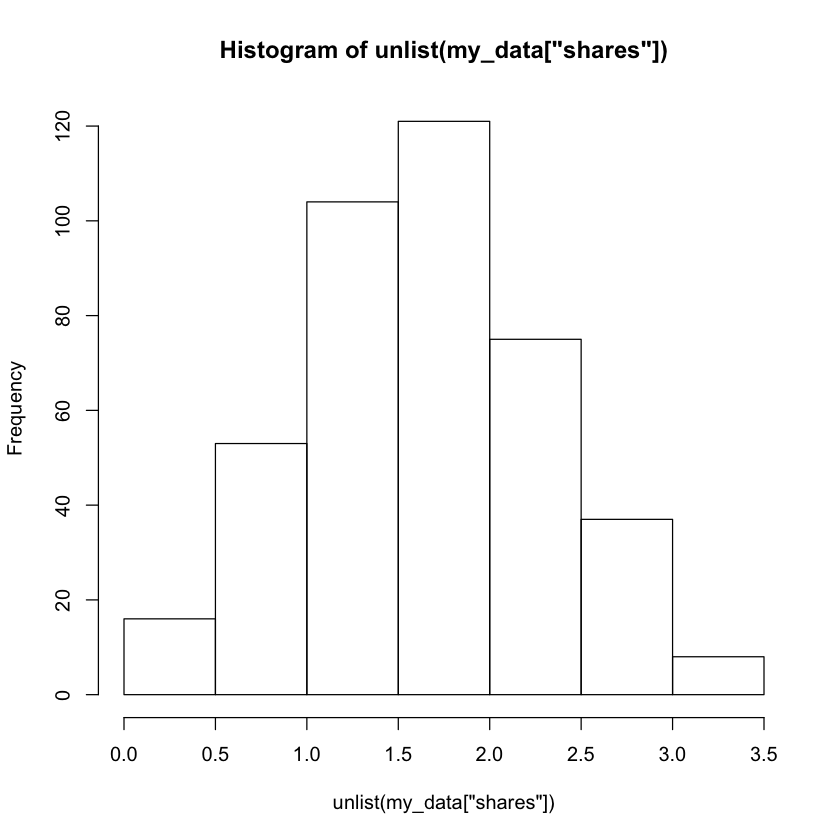

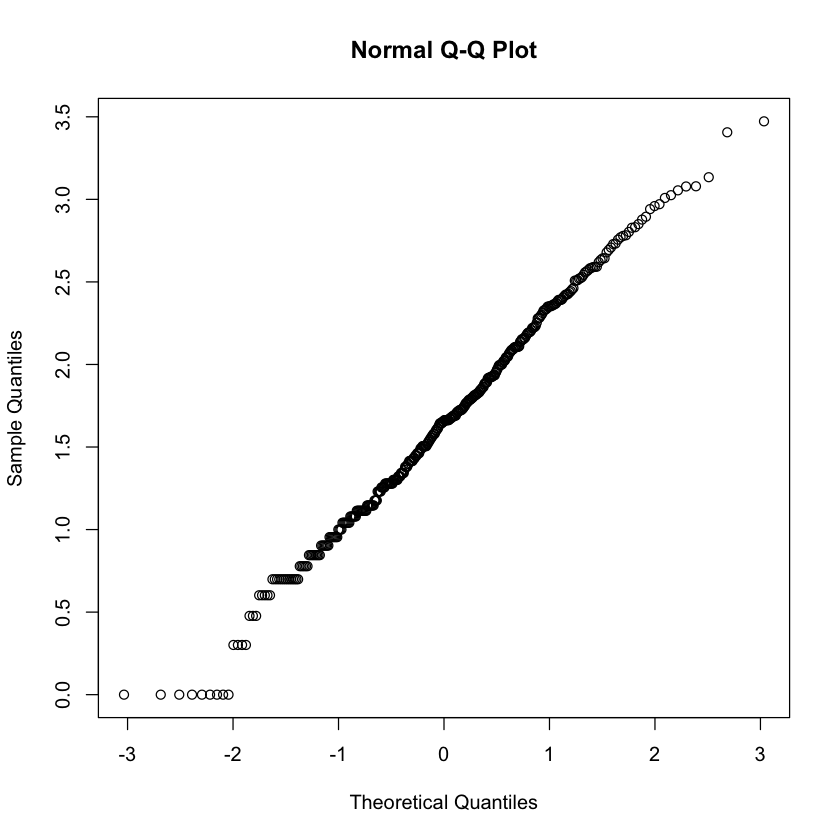

In [3]:
# plotting the normal distribution and probability plot
hist(unlist(my_data["shares"]))
qqnorm(unlist(my_data["shares"]))

## Multiple Linear Regression
In the following cell, we run some linear regression analysis based on text easability and situation model features of Coh-metrix suggested by [1]

In [12]:
# drops <- c("X__1", "id")

text_easability <- c("PCNARz", "PCNARp", "PCSYNz", "PCSYNp", "PCCNCz", "PCCNCp", "PCREFz", "PCREFp", "PCDCz", "PCDCp", "PCVERBz", "PCVERBp", "PCCONNz", "PCCONNp", "PCTEMPz", "PCTEMPp")
situation_model <- c("SMCAUSv", "SMCAUSvp", "SMINTEp", "SMCAUSr", "SMINTEr", "SMCAUSlsa", "SMCAUSwn", "SMTEMP")
descriptive <- c("DESPC", "DESSC", "DESWC", "DESPL", "DESPLd", "DESSL", "DESSLd", "DESWLsy", "DESWLsyd", "DESWLlt", "DESWLltd")

x <- my_data[, (names(my_data) %in% c(text_easability, situation_model))]
y <- my_data["label"]

lin_model <- lm(unlist(y) ~ ., data=x)
summary(lin_model)


Call:
lm(formula = unlist(y) ~ ., data = x)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.88430 -0.39059  0.01525  0.39395  0.90866 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.058682   1.675167   3.617 0.000338 ***
PCNARz       0.292727   0.254320   1.151 0.250433    
PCNARp      -0.007382   0.007546  -0.978 0.328565    
PCSYNz      -0.530314   0.216481  -2.450 0.014738 *  
PCSYNp       0.005641   0.006710   0.841 0.401014    
PCCNCz       0.214420   0.114489   1.873 0.061840 .  
PCCNCp      -0.005748   0.003791  -1.516 0.130322    
PCREFz      -0.026962   0.108466  -0.249 0.803822    
PCREFp      -0.002411   0.003930  -0.614 0.539888    
PCDCz        0.009431   0.124464   0.076 0.939636    
PCDCp        0.003523   0.003970   0.887 0.375498    
PCVERBz     -0.093248   0.132389  -0.704 0.481639    
PCVERBp      0.002772   0.004428   0.626 0.531652    
PCCONNz     -0.064973   0.053526  -1.214 0.225537    
PCCONNp      0.002161   0.

<div class="cite2c-biblio"></div><div class="cite2c-biblio"></div>## Principal Component Analysis (PCA)
In this section, we first run a PCA on all the indexes we have from the coh-metrix to reduce the number of features. Then, using the scores from the PCA model, we run a linear regression analysis to find the significant components in predicting the number of shares.

In [23]:
# Principal Component Analysis (PCA)
# ----------------------------------
# to install the "psych" package, uncomment the two following lines:
# options(download.file.method = "wget")
# install.packages("psych")
library("psych")

# dropping the columns that we do not want in the regression analysis.
truth_labels <- my_data["label"]
drops <- c("X__1", "id", "DESPL", "label", "shares")
descriptive <- c("DESPC", "DESSC", "DESWC", "DESPL", "DESPLd", "DESSL", "DESSLd", "DESWLsy", "DESWLsyd", "DESWLlt", "DESWLltd")
x <- my_data[, !(names(my_data) %in% c(drops, descriptive))]
y <- my_data["shares"]

# printing eigenvalues to find the number of components for PCA
# print(eigen(cor(x)))

pca <- psych::principal(x, nfactors=21, rotate="varimax")
# print(pca$loadings, cutoff = 0.4, sort = TRUE)

# linear regression using the PCA scores
lin_model <- lm(unlist(y) ~ pca$scores + as.matrix(truth_labels))
summary(lin_model)


Call:
lm(formula = unlist(y) ~ pca$scores + as.matrix(truth_labels))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.78859 -0.39268 -0.01791  0.43059  1.84408 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)              1.497957   0.047886  31.282  < 2e-16 ***
pca$scoresRC1           -0.040725   0.031981  -1.273  0.20363    
pca$scoresRC2            0.068080   0.031970   2.129  0.03384 *  
pca$scoresRC6           -0.010418   0.031712  -0.329  0.74269    
pca$scoresRC5           -0.027380   0.031822  -0.860  0.39008    
pca$scoresRC4            0.047123   0.031759   1.484  0.13867    
pca$scoresRC3            0.003332   0.032118   0.104  0.91742    
pca$scoresRC7           -0.002293   0.031866  -0.072  0.94267    
pca$scoresRC15          -0.035945   0.031711  -1.134  0.25770    
pca$scoresRC8            0.008364   0.031697   0.264  0.79201    
pca$scoresRC13           0.041754   0.032473   1.286  0.19927    
pca$scoresRC9      

## Cross validation
In this section, we train our linear regression models using three methods of cross validation.

In [15]:
# K-fold cross-validation for linear regression
# ----------------------------------------------
# to install the "caret" package, uncomment the two following lines:
# options(download.file.method = "wget")
# install.packages("caret")
library(caret)

drops <- c("X__1", "id")
# text_easability <- c("PCNARz", "PCNARp", "PCSYNz", "PCSYNp", "PCCNCz", "PCCNCp", "PCREFz", "PCREFp", "PCDCz", "PCDCp", "PCVERBz", "PCVERBp", "PCCONNz", "PCCONNp", "PCTEMPz", "PCTEMPp")
# situation_model <- c("SMCAUSv", "SMCAUSvp", "SMINTEp", "SMCAUSr", "SMINTEr", "SMCAUSlsa", "SMCAUSwn", "SMTEMP")
descriptive <- c("DESPC", "DESSC", "DESWC", "DESPL", "DESPLd", "DESSL", "DESSLd", "DESWLsy", "DESWLsyd", "DESWLlt", "DESWLltd")
x <- my_data[, !(names(my_data) %in% c(drops, descriptive))]

set.seed(123)
# three different setup for cross validation
# train.control <- trainControl(method = "LOOCV")
train.control <- trainControl(method = "cv", number = 5)
# train.control <- trainControl(method = "repeatedcv", number = 10)
lin_model <- train(shares ~ ., data=x, method = "lm", trControl = train.control)
print(lin_model)
summary(lin_model)

Linear Regression 

414 samples
 96 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 333, 331, 330, 330, 332 
Resampling results:

  RMSE       Rsquared   MAE      
  0.7969528  0.0400272  0.5964022

Tuning parameter 'intercept' was held constant at a value of TRUE



Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.49140 -0.35830 -0.02077  0.36398  1.73974 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  4.878e+02  1.287e+03   0.379  0.70494   
PCNARz       7.083e+01  6.285e+01   1.127  0.26061   
PCNARp       1.671e-02  1.368e-02   1.221  0.22289   
PCSYNz       2.785e+01  2.026e+01   1.375  0.17019   
PCSYNp       1.411e-03  1.180e-02   0.120  0.90487   
PCCNCz      -4.473e+01  5.578e+01  -0.802  0.42322   
PCCNCp       3.066e-04  6.723e-03   0.046  0.96365   
PCREFz       1.370e+02  6.210e+01   2.206  0.02813 * 
PCREFp      -4.333e-03  7.255e-03  -0.597  0.55074   
PCDCz        4.057e+01  8.604e+01   0.471  0.63764   
PCDCp        2.118e-03  6.805e-03   0.311  0.75580   
PCVERBz      6.494e+01  2.447e+01   2.654  0.00837 **
PCVERBp     -8.857e-03  7.531e-03  -1.176  0.24044   
PCCONNz      5.198e+01  6.053e+01   0.859  0.39112   
PCCONNp     -1.016e-03  4

## Stepwise linear regression
We also did a stepwise backward linear regression to eliminate insignificant features from our model. As it is shown in our results, causal verb and causal particles show up as significant predictors in our linear regression model. 

AIC stands for Akaike information criterion which is an estimator of the relative quality of statistical models for a given set of data. Generally, a lower value for AIC mean a model better. There is a $<none>$ feature listed among the other features in the output. As it can be seen, if we eliminate any feature above $<none>$, the AIC value will be lower which means elimination of that feature is good for our model. And, if we remove any feature below $<none>$, the AIC will be larger which means removing the features below $<none>$ is not good for our model.

### Backward

In [20]:
# Stepwise linear regression - backward
drops <- c("X__1", "id")

# paragraph_features <- c("DESPC", "DESPL", "DESPLd", "LSAPP1", "LSAPP1d", "SYNSTRUTt")
# text_easability <- c("PCNARz", "PCNARp", "PCSYNz", "PCSYNp", "PCCNCz", "PCCNCp", "PCREFz", "PCREFp", "PCDCz", "PCDCp", "PCVERBz", "PCVERBp", "PCCONNz", "PCCONNp", "PCTEMPz", "PCTEMPp")
# situation_model <- c("SMCAUSv", "SMCAUSvp", "SMINTEp", "SMCAUSr", "SMINTEr", "SMCAUSlsa", "SMCAUSwn", "SMTEMP")

descriptive <- c("DESPC", "DESSC", "DESWC", "DESPL", "DESPLd", "DESSL", "DESSLd", "DESWLsy", "DESWLsyd", "DESWLlt", "DESWLltd")
x <- my_data[, !(names(my_data) %in% c(drops, descriptive))]

# a lower value of AIC suggests "better" model
lin_model <- lm(shares ~ ., data=x)
formula(lin_model)
summary(step(lin_model, direction = "backward"))

shares ~ PCNARz + PCNARp + PCSYNz + PCSYNp + PCCNCz + PCCNCp + 
    PCREFz + PCREFp + PCDCz + PCDCp + PCVERBz + PCVERBp + PCCONNz + 
    PCCONNp + PCTEMPz + PCTEMPp + CRFNO1 + CRFAO1 + CRFSO1 + 
    CRFNOa + CRFAOa + CRFSOa + CRFCWO1 + CRFCWO1d + CRFCWOa + 
    CRFCWOad + CRFANP1 + CRFANPa + LSASS1 + LSASS1d + LSASSp + 
    LSASSpd + LSAGN + LSAGNd + LDTTRc + LDTTRa + LDMTLD + LDVOCD + 
    CNCAll + CNCCaus + CNCLogic + CNCADC + CNCTemp + CNCTempx + 
    CNCAdd + CNCPos + CNCNeg + SMCAUSv + SMCAUSvp + SMINTEp + 
    SMCAUSr + SMINTEr + SMCAUSlsa + SMCAUSwn + SMTEMP + SYNLE + 
    SYNNP + SYNMEDpos + SYNMEDwrd + SYNMEDlem + SYNSTRUTa + SYNSTRUTt + 
    DRNP + DRVP + DRAP + DRPP + DRPVAL + DRNEG + DRGERUND + DRINF + 
    WRDNOUN + WRDVERB + WRDADJ + WRDADV + WRDPRO + WRDPRP1s + 
    WRDPRP1p + WRDPRP2 + WRDPRP3s + WRDPRP3p + WRDFRQc + WRDFRQa + 
    WRDFRQmc + WRDAOAc + WRDFAMc + WRDCNCc + WRDIMGc + WRDMEAc + 
    WRDPOLc + WRDHYPn + WRDHYPv + WRDHYPnv + RDFRE + RDFKGL + 
    RDL2 + labe

Start:  AIC=-316.36
shares ~ PCNARz + PCNARp + PCSYNz + PCSYNp + PCCNCz + PCCNCp + 
    PCREFz + PCREFp + PCDCz + PCDCp + PCVERBz + PCVERBp + PCCONNz + 
    PCCONNp + PCTEMPz + PCTEMPp + CRFNO1 + CRFAO1 + CRFSO1 + 
    CRFNOa + CRFAOa + CRFSOa + CRFCWO1 + CRFCWO1d + CRFCWOa + 
    CRFCWOad + CRFANP1 + CRFANPa + LSASS1 + LSASS1d + LSASSp + 
    LSASSpd + LSAGN + LSAGNd + LDTTRc + LDTTRa + LDMTLD + LDVOCD + 
    CNCAll + CNCCaus + CNCLogic + CNCADC + CNCTemp + CNCTempx + 
    CNCAdd + CNCPos + CNCNeg + SMCAUSv + SMCAUSvp + SMINTEp + 
    SMCAUSr + SMINTEr + SMCAUSlsa + SMCAUSwn + SMTEMP + SYNLE + 
    SYNNP + SYNMEDpos + SYNMEDwrd + SYNMEDlem + SYNSTRUTa + SYNSTRUTt + 
    DRNP + DRVP + DRAP + DRPP + DRPVAL + DRNEG + DRGERUND + DRINF + 
    WRDNOUN + WRDVERB + WRDADJ + WRDADV + WRDPRO + WRDPRP1s + 
    WRDPRP1p + WRDPRP2 + WRDPRP3s + WRDPRP3p + WRDFRQc + WRDFRQa + 
    WRDFRQmc + WRDAOAc + WRDFAMc + WRDCNCc + WRDIMGc + WRDMEAc + 
    WRDPOLc + WRDHYPn + WRDHYPv + WRDHYPnv + RDFRE + RDFKG


Call:
lm(formula = shares ~ PCNARz + PCNARp + PCSYNz + PCCNCz + PCREFz + 
    PCVERBz + PCVERBp + PCCONNz + CRFNO1 + CRFAO1 + CRFNOa + 
    CRFAOa + CRFSOa + CRFCWO1 + CRFCWO1d + CRFCWOa + CRFANP1 + 
    LSASS1 + LSASS1d + LSASSp + LSAGN + LDTTRc + LDMTLD + LDVOCD + 
    CNCAll + CNCCaus + CNCLogic + CNCADC + CNCAdd + SMCAUSv + 
    SMINTEp + SMCAUSr + SMINTEr + SMCAUSlsa + SMCAUSwn + SMTEMP + 
    SYNLE + SYNNP + SYNMEDpos + SYNMEDwrd + SYNMEDlem + SYNSTRUTt + 
    DRNP + DRAP + DRPVAL + DRNEG + DRGERUND + WRDNOUN + WRDVERB + 
    WRDADJ + WRDPRO + WRDPRP1s + WRDPRP1p + WRDPRP3s + WRDPRP3p + 
    WRDFRQc + WRDFRQa + WRDFRQmc + WRDFAMc + WRDCNCc + WRDIMGc + 
    WRDMEAc + WRDPOLc + WRDHYPn + WRDHYPnv + RDFRE + RDFKGL + 
    label, data = x)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.44960 -0.37931 -0.03053  0.36076  1.80997 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.733e+02  5.877e+01   4.649 4.75e-06 ***
PCNARz       1.035e

### Forward

In [19]:
# Stepwise linear regression - forward
drops <- c("X__1", "id")
descriptive <- c("DESPC", "DESSC", "DESWC", "DESPL", "DESPLd", "DESSL", "DESSLd", "DESWLsy", "DESWLsyd", "DESWLlt", "DESWLltd")
x <- my_data[, !(names(my_data) %in% c(drops, descriptive))]

# a lower value of AIC suggests "better" model
fit_start <- lm(shares ~ 1, data=x)
fit_all <- lm(shares ~ ., data=x)
summary(step(fit_start, direction = "forward", scope=formula(fit_all)))

Start:  AIC=-340.26
shares ~ 1

            Df Sum of Sq    RSS     AIC
+ DRPP       1    4.7432 176.37 -349.25
+ DRAP       1    3.5096 177.61 -346.37
+ label      1    3.4228 177.69 -346.16
+ WRDADV     1    2.5769 178.54 -344.20
+ RDFKGL     1    2.5648 178.55 -344.17
+ WRDPRP1p   1    2.4106 178.71 -343.81
+ CRFAOa     1    2.0908 179.03 -343.07
+ RDFRE      1    2.0786 179.04 -343.04
+ WRDFAMc    1    2.0068 179.11 -342.88
+ DRNP       1    1.9302 179.19 -342.70
+ CNCTemp    1    1.9042 179.21 -342.64
+ CRFNOa     1    1.8729 179.24 -342.57
+ WRDADJ     1    1.8556 179.26 -342.53
+ PCSYNp     1    1.7002 179.42 -342.17
+ CRFSOa     1    1.6712 179.44 -342.10
+ PCSYNz     1    1.6044 179.51 -341.95
+ WRDPOLc    1    1.4990 179.62 -341.71
+ CRFAO1     1    1.4077 179.71 -341.49
+ WRDPRP3p   1    1.4072 179.71 -341.49
+ WRDFRQc    1    1.3913 179.72 -341.46
+ DRNEG      1    1.3507 179.77 -341.36
+ CRFSO1     1    1.0313 180.09 -340.63
+ LSASS1     1    0.9134 180.20 -340.36
+ DRVP  


Call:
lm(formula = shares ~ DRPP + label + DRAP + WRDHYPnv + WRDFAMc + 
    WRDPRP1p + WRDPRP3p + WRDMEAc + CNCTemp + WRDFRQc + WRDPRP2 + 
    LDVOCD + LSAGNd + SMTEMP + DRNP, data = x)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.49369 -0.42441 -0.01372  0.41585  1.89791 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.207159   2.553657   2.822 0.005007 ** 
DRPP         0.004874   0.001923   2.535 0.011630 *  
label        0.247598   0.065666   3.771 0.000188 ***
DRAP        -0.012432   0.003057  -4.067 5.74e-05 ***
WRDHYPnv    -0.451036   0.140924  -3.201 0.001482 ** 
WRDFAMc     -0.001999   0.005269  -0.379 0.704658    
WRDPRP1p     0.010353   0.003699   2.799 0.005379 ** 
WRDPRP3p    -0.004065   0.003406  -1.194 0.233384    
WRDMEAc     -0.006512   0.002422  -2.688 0.007489 ** 
CNCTemp      0.009744   0.003808   2.559 0.010874 *  
WRDFRQc     -0.754741   0.327524  -2.304 0.021715 *  
WRDPRP2      0.006541   0.004051   1.615 0.107

## Penalized regression (LASSO)
Since we have more than 100 Coh-metrix features in our input data, in addition to PCA --which is a dimensionality reduction method--, we wanted to test a model selection method to reduce the effect of insignificant variables in our linear regression models. To achieve our goal, we used a LASSO regression.

In [18]:
# LASSO model
# install.packages("magrittr") # only needed the first time you use it
# install.packages("dplyr")    # alternative installation of the %>%
library(magrittr) # need to run every time you start R and want to use %>%
# library(dplyr)
library(glmnet)

drops <- c("X__1", "id")
descriptive <- c("DESPC", "DESSC", "DESWC", "DESPL", "DESPLd", "DESSL", "DESSLd", "DESWLsy", "DESWLsyd", "DESWLlt", "DESWLltd")
x_init <- my_data[, !(names(my_data) %in% c(drops, descriptive))]

# --------------------------------------
# split the data into train and test set
set.seed(123)
training.samples <- x_init$shares %>% createDataPartition(p = 0.8, list = FALSE)
train.data <- x_init[training.samples, ]
test.data <- x_init[-training.samples, ]

# predictor variables
x <- model.matrix(shares ~ ., train.data)[,-1]
# outcome variable
y <- train.data$shares

# --------------------------------------
# fitting the model

# set the seed for reproducibility
set.seed(123)
cv <- cv.glmnet(x, y, alpha = 1)

# display the best lambda value
cv$lambda.min

# fit the final model
model <- glmnet(x, y, alpha = 1, lambda = cv$lambda.min)

# display regression coefficients
coef(model)

# --------------------------------
# make prediction on the test data
x.test <- model.matrix(shares ~ ., test.data)[,-1]
predictions <- model %>% predict(x.test) %>% as.vector()

# -------------------------
# model performance metrics
data.frame(
    RMSE = RMSE(predictions, test.data$shares),
    Rsquare = R2(predictions, test.data$shares)
)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



[1] 0.06649762

97 x 1 sparse Matrix of class "dgCMatrix"
                       s0
(Intercept)  1.5049182595
PCNARz       .           
PCNARp       .           
PCSYNz       .           
PCSYNp       .           
PCCNCz       .           
PCCNCp       .           
PCREFz       .           
PCREFp       .           
PCDCz        .           
PCDCp        .           
PCVERBz      .           
PCVERBp      .           
PCCONNz      .           
PCCONNp      .           
PCTEMPz      .           
PCTEMPp      .           
CRFNO1       .           
CRFAO1       .           
CRFSO1       .           
CRFNOa       .           
CRFAOa       .           
CRFSOa       .           
CRFCWO1      .           
CRFCWO1d     .           
CRFCWOa      .           
CRFCWOad     .           
CRFANP1      .           
CRFANPa      .           
LSASS1       .           
LSASS1d      .           
LSASSp       .           
LSASSpd      .           
LSAGN        .           
LSAGNd       .           
LDTTRc       .        

RMSE,Rsquare
0.6548688,0.0443554


## References
[1] Wolfe, Christopher R., et al. "A Method for Automatically Analyzing Intelligent Tutoring System Dialogues with Coh-Metrix." Journal of Learning Analytics 5.3 (2018): 222-234.